In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, LSTM, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-15 00:29:54.952934: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 00:29:55.039959: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 00:29:55.751579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

In [3]:
Y_train = Y_train.reshape(-1 , 1)
Y_test = Y_test.reshape(-1 , 1)

In [4]:
input_shape = X_train.shape[1:]
input_shape

(646, 40)

In [5]:
model = Sequential([
    
    LSTM(128, return_sequences=True, input_shape=input_shape),
    LayerNormalization(),
    LSTM(64, return_sequences=True),
    LayerNormalization(),
    LSTM(32),
    Dense(10 ,  activation="softmax")
])

model.compile(loss ='sparse_categorical_crossentropy', optimizer = Adam() , metrics = ['accuracy'])

2024-05-15 00:29:57.679854: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 00:29:57.711448: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 00:29:57.712266: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 00:29:57.715086: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 00:29:57.715548: I external/local_xla/xla/stream_executor

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 646, 128)       │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 646, 128)       │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 646, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 646, 64)        │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 447,200 (1.71 MB)

 Trainable params: 149,066 (582.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 298,134 (1.14 MB)

In [6]:
history = model.fit(X_train , Y_train ,validation_data=(X_test , Y_test) , epochs=30 , batch_size=8)

Epoch 1/30


2024-05-15 00:30:02.173428: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8901


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 134s 105ms/step - accuracy: 0.3749 - loss: 1.7434 - val_accuracy: 0.5010 - val_loss: 1.3708
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 122s 98ms/step - accuracy: 0.5137 - loss: 1.3439 - val_accuracy: 0.5980 - val_loss: 1.1066
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 122s 98ms/step - accuracy: 0.6084 - loss: 1.1158 - val_accuracy: 0.6650 - val_loss: 0.9846
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 132s 106ms/step - accuracy: 0.6870 - loss: 0.9263 - val_accuracy: 0.7290 - val_loss: 0.7900
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 127s 101ms/step - accuracy: 0.7368 - loss: 0.7734 - val_accuracy: 0.7040 - val_loss: 0.8242
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 110ms/step - accuracy: 0.7523 - loss: 0.7218 - val_accuracy: 0.8170 - val_loss: 0.5250
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 113ms/step - accuracy: 0.8497 - loss: 0.4734 - val_accuracy: 0.8780 - val_loss: 0.3846
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 112ms/step - accuracy: 0.879

In [8]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

<Figure size 2000x1500 with 0 Axes>

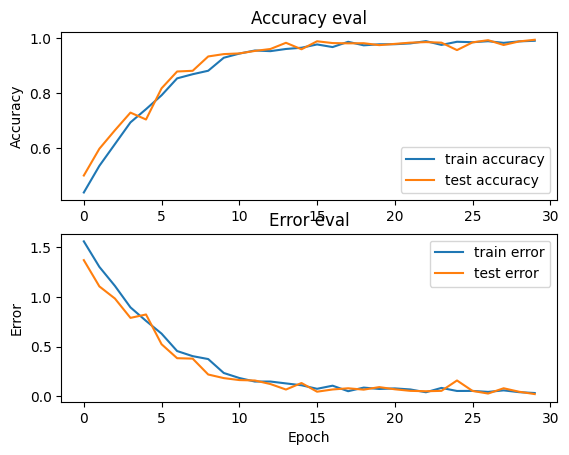

In [9]:
plot_history(history)

In [10]:
model.save('lstm_model.keras')

In [13]:
X_val = np.load('X_val.npy')
Y_val = np.load('Y_val.npy')
Y_val = Y_val.reshape(-1,1)

In [14]:
test_error, test_accuracy = model.evaluate(X_val, Y_val, verbose=1)
print(f"Test accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2736 - loss: 5.4933
Test accuracy: 0.2720000147819519
